<a href="https://www.kaggle.com/code/sohanamitarathod/expected-loss-calculation-cra-2?scriptVersionId=141459712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import warning
import warnings
warnings.filterwarnings('ignore')  # This line suppresses warning messages


In [2]:
#import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.options.display.max_rows= None

In [4]:
#load all the datasets we have created previously
# /kaggle/input/credit-risk-analysis-dfs/loan_data_inputs_test.csv
# /kaggle/input/credit-risk-analysis-dfs/loan_data_inputs_train.csv
# /kaggle/input/credit-risk-analysis-dfs/loan_data_targets_test.csv
# /kaggle/input/credit-risk-analysis-dfs/loan_data_targets_train.csv

import pandas as pd

# File paths
file_paths = {
    'inputs_train': '/kaggle/input/credit-risk-analysis-dfs/loan_data_inputs_train.csv',
    'inputs_test': '/kaggle/input/credit-risk-analysis-dfs/loan_data_inputs_test.csv',
    'targets_train': '/kaggle/input/credit-risk-analysis-dfs/loan_data_targets_train.csv',
    'targets_test': '/kaggle/input/credit-risk-analysis-dfs/loan_data_targets_test.csv'
}

# Load data into data frames
loan_data_inputs_train = pd.read_csv(file_paths['inputs_train'])
loan_data_inputs_test = pd.read_csv(file_paths['inputs_test'])
loan_data_targets_train = pd.read_csv(file_paths['targets_train'])
loan_data_targets_test = pd.read_csv(file_paths['targets_test'])


In [5]:
#print the head of load_data_targets
loan_data_targets_train.head()

,Unnamed: 0,good_bad
0,427211,1
1,206088,1
2,136020,1
3,412305,0
4,36159,0


In [6]:
#drop the first row as it is string
loan_data_targets_train = loan_data_targets_train.drop(0)

In [7]:
loan_data_targets_train.head()

,Unnamed: 0,good_bad
1,206088,1
2,136020,1
3,412305,0
4,36159,0
5,260400,1


In [8]:
#view the shape of load_data_inputs_train dataframe
loan_data_inputs_train.shape

(373028, 340)

In [9]:
#view the shape ofload_data_targets_train dataframe
print(loan_data_targets_train.shape)


(373027, 2)


In [10]:
#create a new column outcome(0 or 1) in load_data_inputs_train
loan_data_inputs_train['outcome'] = loan_data_targets_train['good_bad']

In [11]:
#check the value_counts of outcome
outcome_counts = loan_data_inputs_train['outcome'].value_counts()
print(outcome_counts)

1.0    332249
0.0     40778
Name: outcome, dtype: int64


In [12]:
#type cast outcome as integer
# Handle missing values by filling them with a default value (e.g., 0)
loan_data_inputs_train['outcome'].fillna(0, inplace=True)

# Convert the 'outcome' column to integers
loan_data_inputs_train['outcome'] = loan_data_inputs_train['outcome'].astype(int)


In [14]:
#check the value_counts of outcome
outcome_counts = loan_data_inputs_train['outcome'].value_counts()
print(outcome_counts)

1    332249
0     40779
Name: outcome, dtype: int64


In [15]:
#check the head of loan_data_inputs_train
loan_data_inputs_train.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,0,0,0,0,1,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,0,0,1,0,0,0,0,1
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,0,0,1,0,0,0,0,1
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,0,1,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,0,0,0,1,0,0,0,0,0


In [17]:
#Take only the default cases where outcome = 0 
loan_data_defaults = loan_data_inputs_train[loan_data_inputs_train['outcome'] == 0]

In [20]:
#check the head of loan_data_defaults
loan_data_defaults.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,0,0,0,0,1,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,0,1,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,0,0,0,1,0,0,0,0,0
27,454638,454638,10494891,12367014,20000,20000,20000.0,36 months,11.99,664.20,...,0,0,0,0,1,0,0,0,0,0
35,222888,222888,1197171,1438165,8500,8500,8500.0,36 months,8.90,269.91,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#check for null values in every column
null_counts = loan_data_defaults.isnull().sum()
print(null_counts)


Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3046
emp_length                                         

In [24]:
#select only the important features we have created before in preprocessing steps and create a list of those features

feature_selection=[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NC_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
    'purpose:educ_sm_b_wedd_ren_en_mov_house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:moving',
    'purpose:house',
    'purpose:other',
    'purpose:medical',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:major_purchase',
    'purpose:car',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issued_date:<38',
'mths_since_issued_date:38-39',
'mths_since_issued_date:40-41',
'mths_since_issued_date:42-48',
'mths_since_issued_date:49-52',
'mths_since_issued_date:53-64',
'mths_since_issued_date:65-84',
'mths_since_issued_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:>45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
    'acc_now_delinq:>5',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'total_rev_hi_lim:<=5k',
'total_rev_hi_lim:5k_10k',
'total_rev_hi_lim:10k_20k',
'total_rev_hi_lim:20k_30k',
'total_rev_hi_lim:30k_40k',
'total_rev_hi_lim:40k_50k',
'total_rev_hi_lim:50k_65k',
'total_rev_hi_lim:65k_80k',
'total_rev_hi_lim:>80k',
'dti:<5',
'dti:5-10',
'dti:10-15',
'dti:15-20',
'dti:20-25',
'dti:25-30',
'dti:30-35',
'dti:35-40',
'dti:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-90',
'mths_since_last_record:90-120',
'mths_since_last_record:120-127',
'mths_since_last_record:>=127','loan_amnt','funded_amnt','int_rate','installment','recoveries','total_rec_prncp']



In [27]:
#assign them into a inputs_train_with_ref_category with only those columns which are in the list(fetaure selection)
loan_data_defaults = loan_data_defaults.reindex(feature_selection, axis='columns')

In [28]:
#check for null values in load_data_defaults
loan_data_defaults.isnull().sum()

grade:A                                        0
grade:B                                        0
grade:C                                        0
grade:D                                        0
grade:E                                        0
grade:F                                        0
grade:G                                        0
home_ownership:RENT_OTHER_NONE_ANY             0
home_ownership:OWN                             0
home_ownership:MORTGAGE                        0
addr_state:ND_NE_IA_NC_FL_HI_AL                0
addr_state:NM_VA                               0
addr_state:OK_TN_MO_LA_MD_NC                   0
addr_state:UT_KY_AZ_NJ                         0
addr_state:AR_MI_PA_OH_MN                      0
addr_state:RI_MA_DE_SD_IN                      0
addr_state:GA_WA_OR                            0
addr_state:WI_MT                               0
addr_state:IL_CT                               0
addr_state:KS_SC_CO_VT_AK_MS                   0
addr_state:WV_NH_WY_

### Recovery Rate:
It is the recovered amount divided by the funded amount

In [29]:
#create a new column recovery_rate i.e 'recoveries'/'funded_amnt'
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [30]:
#check the statistics of recovery_rate
loan_data_defaults['recovery_rate'].describe()                                                                            #recovery rate has to be from 0 to 1

count    40779.000000
mean         0.051737
std          0.085881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101865
max          1.207630
Name: recovery_rate, dtype: float64

In [31]:
#convert recovery rate in the range of 0 to 1
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1,1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0,0,loan_data_defaults['recovery_rate'])

In [32]:
# describe recovery rate 0 to 1
loan_data_defaults['recovery_rate'].describe()

count    40779.000000
mean         0.051700
std          0.085447
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101865
max          1.000000
Name: recovery_rate, dtype: float64

### The credit conversion factor (CCF) converts the amount of a free credit line and other off-balance-sheet transactions (with the exception of derivatives) to an EAD (exposure at default) amount.

The CCF is a crucial factor in assessing a bank's credit risk exposure. It's used to calculate the Exposure at Default (EAD), which represents the amount of exposure a financial institution has to a borrower at the time of default.

In [33]:
#credit conversion factor(CCF)
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [34]:
#CCF has to be in the range of 0 to 1
loan_data_defaults['CCF'].describe()

count    40779.000000
mean         0.719449
std          0.204453
min          0.000000
25%          0.608261
50%          0.769330
75%          0.876846
max          1.000000
Name: CCF, dtype: float64

In [35]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

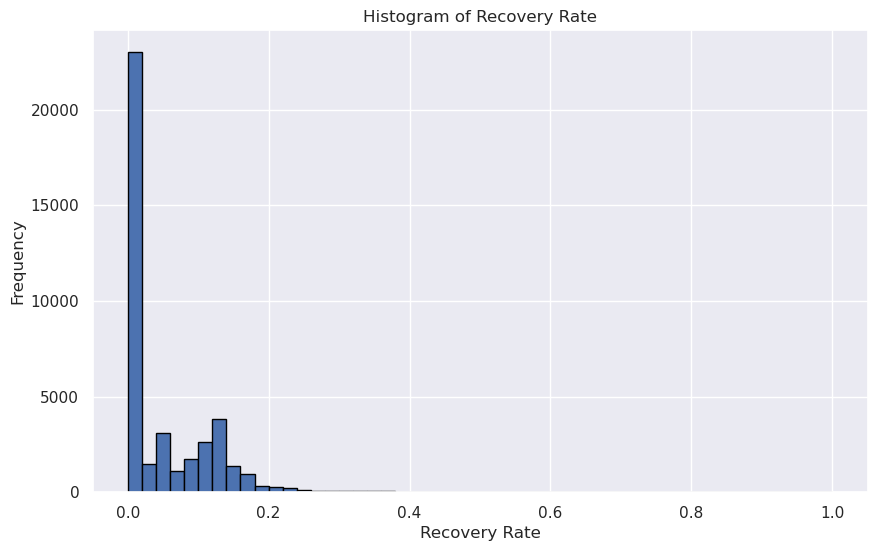

In [36]:
#plot a histogram of recovery_rate with bins=50
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(loan_data_defaults['recovery_rate'], bins=50, edgecolor='black')
plt.title('Histogram of Recovery Rate')
plt.xlabel('Recovery Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

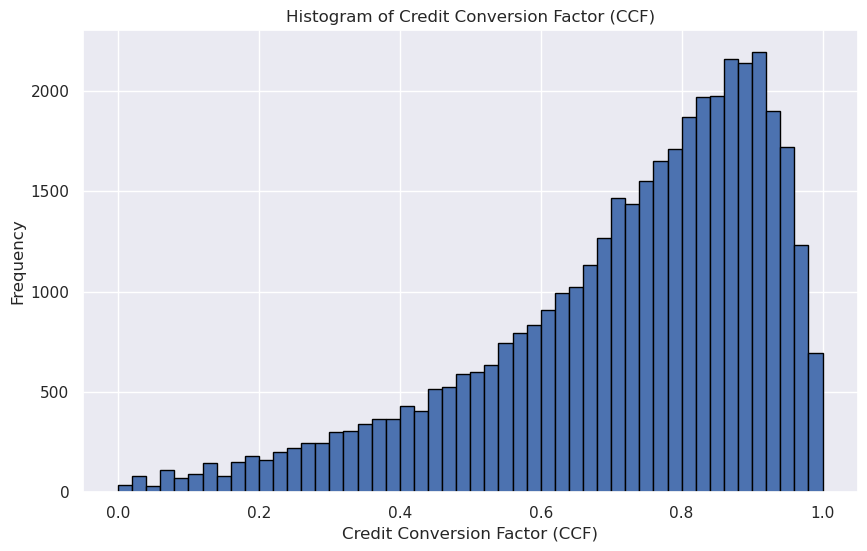

In [37]:
#plot a histogram of CCF with 50 bins
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(loan_data_defaults['CCF'], bins=50, edgecolor='black')
plt.title('Histogram of Credit Conversion Factor (CCF)')
plt.xlabel('Credit Conversion Factor (CCF)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
#create a new column recovery_rate_0_1...if the recovery_rate is 0 then insert 0 and if it is greater than 0 replace it with 1
loan_data_defaults['recovery_rate_0_1']  = np.where(loan_data_defaults['recovery_rate'] == 0,0,1)

In [39]:
#value_counts of recovery_rate_0_1
recovery_rate_0_1_counts = loan_data_defaults['recovery_rate_0_1'].value_counts()
print(recovery_rate_0_1_counts)


0    21277
1    19502
Name: recovery_rate_0_1, dtype: int64


# **LGD_Model**

You've outlined the approach for creating LGD (Loss Given Default) models, which are used to estimate the extent of losses that a lender might incur in the event of default by a borrower. The approach involves building two separate models to address cases where the recovery rate is 0 and cases where the recovery rate is greater than 0.

In LGD model we will basically create 2 models for determining the recovery rate if the recovery rate is 0 or greater than 0:

1.we will create a logistic regression model for determining whether the recovery rate is 0 or 1.

2.For all the recovery rate greater than 0 we will create a linear regression model to determine how much greater than 0 the value of recovery rate is.


#### Doing the First part: Stage_1

In [114]:
#check the column name of loan_data_defaults
column_names = loan_data_defaults.columns
print(column_names)


Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)


In [126]:
#Train Test split of load_data_defaults 
from sklearn.model_selection import train_test_split

lgd_input_train, lgd_input_test, lgd_target_train, lgd_target_test = train_test_split(
    loan_data_defaults.drop(['recoveries', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
    loan_data_defaults['recovery_rate_0_1'],
    test_size=0.2,
    random_state=42
)


In [127]:
#create a list of reference categories selecting only one column from each parent column
ref_categories=['grade:G',
               'home_ownership:RENT_OTHER_NONE_ANY',
               'addr_state:ND_NE_IA_NC_FL_HI_AL',
               'verification_status:Verified',
                'purpose:educ_sm_b_wedd_ren_en_mov_house',
                'initial_list_status:f',
                'term:60',
                'emp_length:0',
                'mths_since_issued_date:>84',
                'int_rate:20.281',
                'mths_since_earliest_cr_line:<140',
                'delinq_2yrs:>18',
                'inq_last_6mths:7-9',
                'open_acc:=0',
                'pub_rec:0-3',
                'total_acc:>85',
                'acc_now_delinq:<0',
                'total_rev_hi_lim:<=5k',
                'annual_inc:<20k',
                'dti:>40',
                'mths_since_last_delinq:0-3',
                'mths_since_last_record:Missing'
               ]

In [128]:
#drop the reference categories from lgd_input_train
lgd_input_train = lgd_input_train.drop(ref_categories, axis=1)


### Model Building and Training

In [129]:
#import logistic regression and metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
#create an object of logistic regression with max_iter=200
reg = LogisticRegression(max_iter=200)

In [131]:
#check the shape of lgd_inputs_train
print(lgd_input_train.shape)

(32623, 131)


In [132]:
#check the shape of lgd_target_train
print(lgd_target_train.shape)


(32623,)


In [133]:
#lgd_input_train.head()
#lgd_target_train.head()

nan_count = lgd_input_train.isna().sum(axis=1)
rows_with_nan = nan_count[nan_count > 0]
num_rows_with_nan = len(rows_with_nan)

print(f"Number of rows with NaN values: {num_rows_with_nan}")

columns_with_nan = lgd_input_train.columns[lgd_input_train.isna().any()]
print("Columns with NaN values:", columns_with_nan)


Number of rows with NaN values: 32623
Columns with NaN values: Index(['acc_now_delinq:0-1', 'acc_now_delinq:1-2', 'acc_now_delinq:2-3',
       'acc_now_delinq:3-5', 'acc_now_delinq:>5'],
      dtype='object')


In [134]:
lgd_input_train = lgd_input_train.fillna(0)


In [135]:
#fit the logistic reg model on lgd_inputs_train and lgd_target_train
reg.fit(lgd_input_train,lgd_target_train)

LogisticRegression(max_iter=200)

In [136]:
#testing
lgd_predictions = reg.predict(lgd_input_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- acc_now_delinq:<0
- addr_state:ND_NE_IA_NC_FL_HI_AL
- annual_inc:<20k
- delinq_2yrs:>18
- dti:>40
- ...


In [137]:
train_columns = set(lgd_input_train.columns)
test_columns = set(lgd_input_test.columns)

columns_not_in_test = train_columns - test_columns
columns_not_in_train = test_columns - train_columns

print("Columns in lgd_input_train but not in lgd_input_test:", columns_not_in_test)
print("Columns in lgd_input_test but not in lgd_input_train:", columns_not_in_train)


Columns in lgd_input_train but not in lgd_input_test: set()
Columns in lgd_input_test but not in lgd_input_train: {'term:60', 'mths_since_issued_date:>84', 'acc_now_delinq:<0', 'pub_rec:0-3', 'addr_state:ND_NE_IA_NC_FL_HI_AL', 'dti:>40', 'grade:G', 'delinq_2yrs:>18', 'emp_length:0', 'mths_since_last_record:Missing', 'total_rev_hi_lim:<=5k', 'annual_inc:<20k', 'total_acc:>85', 'initial_list_status:f', 'mths_since_last_delinq:0-3', 'verification_status:Verified', 'open_acc:=0', 'mths_since_earliest_cr_line:<140', 'int_rate:20.281', 'home_ownership:RENT_OTHER_NONE_ANY', 'purpose:educ_sm_b_wedd_ren_en_mov_house', 'inq_last_6mths:7-9'}


In [138]:
columns_to_drop_test = [
    'term:60', 'mths_since_issued_date:>84', 'acc_now_delinq:<0', 'pub_rec:0-3', 'addr_state:ND_NE_IA_NC_FL_HI_AL', 'dti:>40', 'grade:G', 'delinq_2yrs:>18', 'emp_length:0', 'mths_since_last_record:Missing', 'total_rev_hi_lim:<=5k', 'annual_inc:<20k', 'total_acc:>85', 'initial_list_status:f', 'mths_since_last_delinq:0-3', 'verification_status:Verified', 'open_acc:=0', 'mths_since_earliest_cr_line:<140', 'int_rate:20.281', 'home_ownership:RENT_OTHER_NONE_ANY', 'purpose:educ_sm_b_wedd_ren_en_mov_house', 'inq_last_6mths:7-9'
]

lgd_input_test = lgd_input_test.drop(columns=columns_to_drop_test)


In [140]:
#check the shape of lgd_input_test
print(lgd_input_test.shape)
print(lgd_input_train.shape)


(8156, 131)
(32623, 131)


Now test the model

In [142]:
lgd_input_test = lgd_input_test.fillna(0)


In [143]:
#testing
lgd_predictions = reg.predict(lgd_input_test)


In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(lgd_target_test, lgd_predictions)
confusion = confusion_matrix(lgd_target_test, lgd_predictions)
report = classification_report(lgd_target_test, lgd_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.644310936733693
Confusion Matrix:
 [[3000 1286]
 [1615 2255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67      4286
           1       0.64      0.58      0.61      3870

    accuracy                           0.64      8156
   macro avg       0.64      0.64      0.64      8156
weighted avg       0.64      0.64      0.64      8156



#### Drop the reference categories from lgd_input_test

drop any column from ref_categories list present in lgd_input_test

In [145]:
columns_to_drop = [col for col in ref_categories if col in lgd_input_test.columns]
lgd_input_test = lgd_input_test.drop(columns=columns_to_drop)


In [146]:
#check the shape of lgd_input_test ---- make sure that the number of columns used in traing is same as the number of columns in testing
lgd_input_test.shape

(8156, 131)

In [147]:
lgd_input_train.shape

(32623, 131)

In [148]:
#predict the results of lgd_input_test
pred = reg.predict(lgd_input_test)


In [149]:
#predict the result using predict_proba function
prob_pred = reg.predict_proba(lgd_input_test)[:][:,1]

In [150]:
#create an empty dataframe that will store the final results
df_actual_predicted_probs = pd.DataFrame()

In [151]:
#create 2 columns one will store the pred and other will store the prob_pred
df_actual_predicted_probs['lgd_test_outcome'] = pred
df_actual_predicted_probs['lgd_test_proba'] = prob_pred


In [152]:
#check the head of the dataframe
df_actual_predicted_probs.head()

,lgd_test_outcome,lgd_test_proba
0,0,0.432200
1,0,0.193687
2,1,0.613454
3,0,0.437483
4,0,0.458065


In [155]:
#You can also get 0 or 1 by defining a threshold value of prob_pred
#tr=0.5
#df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['lgd_test_proba'] > tr,1,0) 

tr = 0.5
df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['lgd_test_proba'] > tr, 1, 0)


In [156]:
#check the shape of df_actual_predicted_probs
print(df_actual_predicted_probs.shape)


(8156, 3)


In [157]:
#print the confusion matrix using lgd_target_test and pred

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(lgd_target_test, pred)
print(confusion)


[[3000 1286]
 [1615 2255]]


In [158]:
#accuracy of model
accuracy = (confusion[0, 0] + confusion[1, 1]) / np.sum(confusion)
print("Accuracy:", accuracy)


Accuracy: 0.644310936733693


The pickle module allows us to serialize and deserialize Python objects, which is useful for saving and loading machine learning models, data, and other objects.

In [160]:
#import pickle
import pickle

In [161]:
#save the reg model
pickle.dump(reg,open('lgd_stage_1.sav','wb'))

## Stage-2...where >0 linear reg to determine how much >0   for recovery rate

Stage_2:Take those records where recovery_rate_0_1 is 1 and determine the recovery_rate by Linear REG

In [167]:
#take all records from load_data_defaults hwere recovery_rate_0_1 is 1
lgd_loan_data_2 = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [168]:
#check the shape of lgd_loan_data_2
lgd_loan_data_2 = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]


In [169]:
#train test split
lgd_input_train_2,lgd_input_test_2,lgd_target_train_2,lgd_target_test_2 = train_test_split(lgd_loan_data_2.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),lgd_loan_data_2['recovery_rate'],test_size=0.2,random_state=42)

In [170]:
#drop the refrence categories from lgd_input_train_2
columns_to_drop = [col for col in ref_categories if col in lgd_input_train_2.columns]
lgd_input_train_2 = lgd_input_train_2.drop(columns=columns_to_drop)


In [171]:
#import linear regression
from sklearn.linear_model import LinearRegression

In [172]:
#create an object  of linear regression
lin_reg = LinearRegression()

In [174]:
lgd_input_train_2.fillna(0, inplace=True)
lgd_target_train_2.fillna(0, inplace=True)

In [175]:
#fit the lin_reg on lgd_input_train_2,lgd_target_train_2
lin_reg.fit(lgd_input_train_2, lgd_target_train_2)


LinearRegression()

In [176]:

# Drop reference categories from lgd_input_test_2
columns_to_drop = [col for col in ref_categories if col in lgd_input_test_2.columns]
lgd_input_test_2 = lgd_input_test_2.drop(columns=columns_to_drop)


In [181]:
#check the shape of lgd_input_test_2...make sure the number of columns are same as that of lgd_input_train_2
print(lgd_input_test_2.shape)
print(lgd_input_train_2.shape)

(3901, 131)
(15601, 131)


In [183]:
lgd_input_test_2.fillna(0, inplace=True)
lgd_target_test_2.fillna(0, inplace=True)

In [184]:
# Predict the results using linear regression
pred_lin = lin_reg.predict(lgd_input_test_2)


In [185]:
#print the predicted results
pred_lin

array([0.13064139, 0.07536924, 0.08950932, ..., 0.13268261, 0.07460515,
       0.08856483])

In [186]:
#check the r2_score
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(lgd_target_test_2, pred_lin)

print("R-squared score:", r2)


R-squared score: 0.12292382960235793


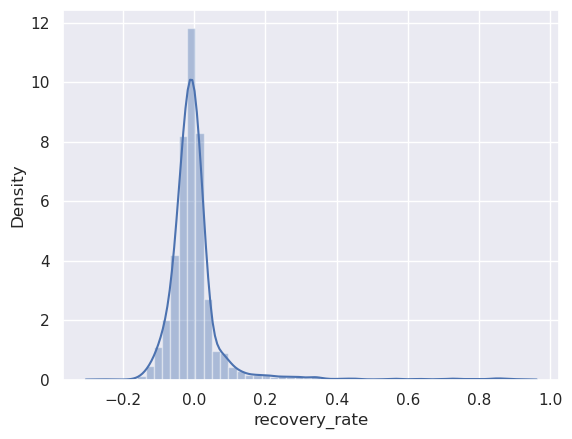

In [187]:
#plot the distribution plot for lgd_target_test_2-pred_lin
sns.distplot(lgd_target_test_2-pred_lin)

plt.show()

In [188]:
#save the model using pickle
pickle.dump(lin_reg,open('lgd_stage_2.sav','wb'))

# Combination of Stage1 and Stage2

we will multiply the results of stage_1 and stage_2

In [190]:
#using the ln_reg method predict the results of stage_1 test i.e lgd_input_test
pred_stage_2_all = lin_reg.predict(lgd_input_test)

In [191]:
#print the pred_stage_2_all
pred_stage_2_all

array([0.14494366, 0.1763407 , 0.15244706, ..., 0.06653735, 0.12758192,
       0.10954721])

In [192]:
#make sure that the length of pred and pred_stage_2_all is same becoz we will combine the results by multiplying them
print(len(pred),len(pred_stage_2_all))

8156 8156


In [193]:
#multiply the stage_1 and stage_2 results
pred_lgd_final = pred * pred_stage_2_all


In [194]:
#print the pred_lgd_final
pred_lgd_final

array([0.        , 0.        , 0.15244706, ..., 0.06653735, 0.12758192,
       0.        ])

In [ ]:
#check the basic stats of pred_lgd_final
pd.DataFrame(pred_lgd_final).describe()

,0
count,8156.000000
mean,0.052673
std,0.056646
min,0.000000
25%,0.000000
50%,0.041198
75%,0.105408
max,0.294530


#  Exposure at Default (EAD) Model

In [195]:
#check the columns of load_data_defaults
print(loan_data_defaults.columns)


Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)


In [197]:
print(loan_data_defaults.columns)

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)


CCF stands for "Credit Conversion Factor." It is a measure used in the context of credit risk modeling to estimate the portion of an exposure that could potentially be drawn down by a borrower in the event of default. In simpler terms, it represents the percentage of a credit line that is expected to be utilized in the event of default.

In [200]:
#Train test split using the CCF as output feature
from sklearn.model_selection import train_test_split

# Drop the specified columns
inputs = loan_data_defaults.drop(['recoveries', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1)
targets = loan_data_defaults['CCF']

# Perform train-test split
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)


In [201]:
#drop the refrence categories
columns_to_drop = [col for col in ref_categories if col in ead_inputs_train.columns]
ead_inputs_train = ead_inputs_train.drop(columns=columns_to_drop)

In [207]:
ead_inputs_train = ead_inputs_train.fillna(0)
ead_targets_train = ead_targets_train.fillna(0)
ead_inputs_test= ead_inputs_test.fillna(0)


In [203]:
#create an object of linear regression and fit it on ead_inputs_train,ead_targets_train

reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [204]:
#drop the refrence categories from ead_inputs_test
columns_to_drop = [col for col in ref_categories if col in ead_inputs_test.columns]
ead_inputs_test = ead_inputs_test.drop(columns=columns_to_drop)


In [208]:
#predict the results of ead_inputs_test
y_pred_test_ead = reg_ead.predict(ead_inputs_test)


In [209]:
#print the results
y_pred_test_ead

array([0.95791852, 0.8922148 , 0.89746726, ..., 0.61009004, 0.88001427,
       0.58115873])

<Axes: xlabel='CCF', ylabel='Density'>

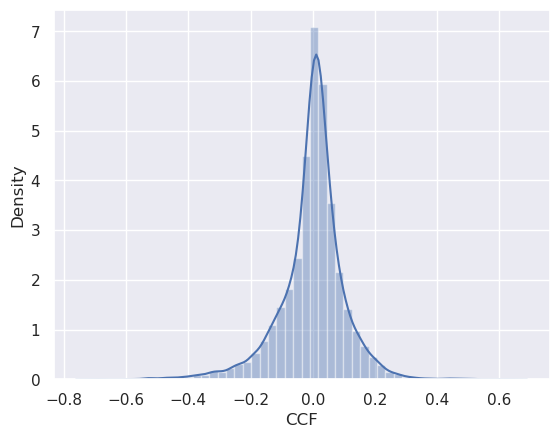

In [210]:
#plot the distribution plot of ead_targets_test-y_pred_test_ead
sns.distplot(ead_targets_test-y_pred_test_ead)

In [211]:
#chekc the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.718171
std,0.180201
min,-0.574195
25%,0.631300
50%,0.729616
75%,0.832080
max,1.258426


We see that some values are negitive and this predicted value is of CCF...so it can't be negitive

In [212]:
#replace all the negitive values with 0 and all values which are greater than 1 with 1
y_pred_test_ead = np.where(y_pred_test_ead < 0,0,y_pred_test_ead)
y_pred_test_ead = np.where(y_pred_test_ead > 1, 1, y_pred_test_ead)


In [213]:
#save the EAD model
pickle.dump(reg_ead,open('ead_model.sav','wb'))

In [214]:
#now again check the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.716403
std,0.171421
min,0.000000
25%,0.631300
50%,0.729616
75%,0.832080
max,1.000000


# Calculating EL:

### Expected Loss = PD * LGD * EAD

In [216]:
#check the shape of lgd_input_test
#lgd_input_test.shape()
print(lgd_input_test.shape)

(8156, 131)


In [217]:
#check the shape of lgd_target_test
print(lgd_target_test.shape)

(8156,)


In [218]:
#Take a testing sample as lgd_input_test and predict the EXPECTED LOSS
testing_sample = lgd_input_test

In [219]:
#check the shape of testing_sample
print(testing_sample.shape) 

(8156, 131)


In [220]:
#create an empty dataframe that will store the final results
testing_outcome = pd.DataFrame()

In [221]:
testing_outcome.head()

""


In [225]:
#create 2 columns for prediction of LGD_stage_1 and LGD_stage_2
# Assuming pred_lgd_final contains the predictions for LGD stage 1 and LGD stage 2
testing_outcome['recovery_rate_stage_1'] = pred_lgd_final
testing_outcome['recovery_rate_stage_2'] = y_pred_test_ead


In [226]:
#create a new column recovery_rate that will have the final results of LGD_Model i.e the combition of stage_1 and stage_2
testing_outcome['recovery_rate'] = testing_outcome['recovery_rate_stage_1'] * testing_outcome['recovery_rate_stage_2']

In [227]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate
0,0.000000,0.957919,0.000000
1,0.000000,0.892215,0.000000
2,0.152447,0.897467,0.136816
3,0.000000,0.632293,0.000000
4,0.000000,0.614888,0.000000


In [228]:
# Replace all the negative values in recovery_rate with 0 and all values which are greater than 1 with 1

# Replace all the negative values in recovery_rate with 0
testing_outcome['recovery_rate'] = testing_outcome['recovery_rate'].apply(lambda x: 0 if x < 0 else x)

# Replace all values greater than 1 in recovery_rate with 1
testing_outcome['recovery_rate'] = testing_outcome['recovery_rate'].apply(lambda x: 1 if x > 1 else x)


In [229]:
#create a new column LGD in testing_outcome i.e (1-recovery_rate)

testing_outcome['LGD'] = 1 - testing_outcome['recovery_rate']

# Print the updated DataFrame
print(testing_outcome.head())


   recovery_rate_stage_1  recovery_rate_stage_2  recovery_rate       LGD
0               0.000000               0.957919       0.000000  1.000000
1               0.000000               0.892215       0.000000  1.000000
2               0.152447               0.897467       0.136816  0.863184
3               0.000000               0.632293       0.000000  1.000000
4               0.000000               0.614888       0.000000  1.000000


In [230]:
#check the basic stats of LGD
testing_outcome['LGD'].describe()

count    8156.000000
mean        0.963851
std         0.048434
min         0.777113
25%         0.929860
50%         1.000000
75%         1.000000
max         1.000000
Name: LGD, dtype: float64

In [232]:
#create a new column CCF that will store the predicted results of EAD_Model
testing_outcome['CCF'] = y_pred_test_ead

In [234]:
#check the basic stats of CCF
testing_outcome['CCF'].describe()

count    8156.000000
mean        0.716403
std         0.171421
min         0.000000
25%         0.631300
50%         0.729616
75%         0.832080
max         1.000000
Name: CCF, dtype: float64

In [235]:
# Replace all the negitive values in CCF with 0 and all values which are greater than 1 with 1

testing_outcome['CCF'] = testing_outcome['CCF'].apply(lambda x: 0 if x < 0 else x)
testing_outcome['CCF'] = testing_outcome['CCF'].apply(lambda x: 1 if x > 1 else x)

In [236]:
#check the basic stats of CCF
ccf_stats = testing_outcome['CCF'].describe()
print(ccf_stats)


count    8156.000000
mean        0.716403
std         0.171421
min         0.000000
25%         0.631300
50%         0.729616
75%         0.832080
max         1.000000
Name: CCF, dtype: float64


In [238]:
#check the shape of testing_outcome
print(testing_outcome.shape)

(8156, 5)


In [239]:
#check the shape of testing_sample
print(testing_sample.shape)

(8156, 131)


In [240]:
#create a new column EAD i.e (CCF * funded_amt)
testing_outcome['EAD'] = testing_outcome['CCF'] * testing_sample['funded_amnt'].values


In [241]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD
0,0.000000,0.957919,0.000000,1.000000,0.957919,23540.847596
1,0.000000,0.892215,0.000000,1.000000,0.892215,17844.296010
2,0.152447,0.897467,0.136816,0.863184,0.897467,15548.620310
3,0.000000,0.632293,0.000000,1.000000,0.632293,10116.683239
4,0.000000,0.614888,0.000000,1.000000,0.614888,4688.519839


In [242]:
#check the basic stats of EAD
testing_outcome['EAD'].describe()

count     8156.000000
mean     10677.283859
std       7685.086296
min          0.000000
25%       4935.591549
50%       8451.891245
75%      14316.607005
max      35000.000000
Name: EAD, dtype: float64

## Calculate results of PD_Model (Probability of Default)

In [243]:
#check the columns of testing_sample
print(testing_sample.columns)


Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NM_VA',
       'addr_state:OK_TN_MO_LA_MD_NC',
       ...
       'mths_since_last_delinq:>=57', 'mths_since_last_record:0-90',
       'mths_since_last_record:90-120', 'mths_since_last_record:120-127',
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'total_rec_prncp'],
      dtype='object', length=131)


### Make sure you pass only those columns to the PD_Model which you have passed in PD_Model while model training

In [ ]:
#Drop total_rec_prncp column as we didn't pass this in PD_Model while model training
testing_sample.drop('total_rec_prncp',axis=1,inplace=True)

In [252]:
import pickle

# Assuming you have a model named reg_pd
reg_pd = ...

# Save the model to a file
model_filename = '/kaggle/working/pd_model_gradient.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(reg_pd, file)

print(f"PD model saved successfully as {model_filename}")


PD model saved successfully as /kaggle/working/pd_model_gradient.sav


In [257]:
#predict the results of testing_sample using the PD_model
import pickle

# Load the trained classifier model
reg_pd = pickle.load(open('pd_model_gradient.sav', 'rb'))

# Ensure your testing_sample has the same features used during training
# Make sure to preprocess the testing_sample similarly to the training data

# Predict the probability of the positive class (1)
pd_predictions = reg_pd.predict_proba(testing_sample)[:, 1]


AttributeError: 'ellipsis' object has no attribute 'predict_proba'

In [ ]:
#predict the predict_proba results of testing_sample using PD_Model and store it in 'PD'
testing_outcome['PD'] = 

In [ ]:
#check the hed of testing_outcome


,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.270165
1,0,0.047874,0.000000,1.000000,0.377057,4524.681273,0.229002
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.297923
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.136226
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.158261


In [ ]:
#check the basic stats of PD


count    8156.000000
mean        0.151049
std         0.071440
min         0.015205
25%         0.097416
50%         0.140953
75%         0.196240
max         0.483204
Name: PD, dtype: float64

In [ ]:
#create a new column 'EL' i.e Expected_Loss by ('PD' * 'LGD' * 'EAD')
testing_outcome['EL'] =

In [ ]:
#check the head of testing_outcome


,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.270165,2117.611035
1,0,0.047874,0.000000,1.000000,0.377057,4524.681273,0.229002,1036.161103
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.297923,4657.024757
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.136226,329.815100
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.158261,750.007737


In [ ]:
#Add the column 'funded_amnt' from testing_sample to testing_outcome
testing_outcome['Funded_amt'] = testing_sample['funded_amnt'].values

In [ ]:
#check the head of testing_outcome


,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL,Funded_amt
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.270165,2117.611035,15000
1,0,0.047874,0.000000,1.000000,0.377057,4524.681273,0.229002,1036.161103,12000
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.297923,4657.024757,17325
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.136226,329.815100,5000
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.158261,750.007737,7625


In [ ]:
#Finally, create a new_dataframe testing_outcome_final which will have only 'Funded_amt','PD','LGD','EAD','EL'
testing_outcome_final =


,Funded_amt,PD,LGD,EAD,EL
0,15000,0.270165,0.933814,8393.759820,2117.611035
1,12000,0.229002,1.000000,4524.681273,1036.161103
2,17325,0.297923,1.000000,15631.629299,4657.024757
3,5000,0.136226,0.942210,2569.582343,329.815100
4,7625,0.158261,1.000000,4739.051819,750.007737


record:0---When the Funded amount is 15000 the bank suffers a loss of 2117.6 from that customer..

record:1---When the Funded amount is 12000 the bank suffers a loss of 1036.1 from that customer..

record:3---When the Funded amount is 17325 the bank suffers a loss of 4657.0 from that customer..


and so on......



## We will get the overall expected_loss suffered by the bank

In [ ]:
#Divide the  expected_loss sum by funded_amnt sum
testing_outcome_final['EL'].sum()/testing_outcome_final['Funded_amt'].sum()

0.10892474229367789

We observe that the Bank suffers an Expected loss of 10.8% while giving loans to it's customers

#observed EL is between 2% to 15% based on this banks can be aggressive or lenient while giving loans

Thank you!!!!